In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df['Sex'] = df['Sex'].replace({'F':0,'M':1})
df['BP'] = df['BP'].replace({'LOW':0 , 'NORMAL':1 , 'HIGH':2})
df['Cholesterol'] = df['Cholesterol'].replace({'NORMAL':0 , 'HIGH':1})
df['Drug'] = df['Drug'].replace({'drugA':0 , 'drugB':1 , 'drugC':2 , 'drugX':3 , 'drugY':4})
df

C:\Users\Devve\AppData\Local\Temp\ipykernel_12848\1608148740.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'F':0,'M':1})
C:\Users\Devve\AppData\Local\Temp\ipykernel_12848\1608148740.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP'] = df['BP'].replace({'LOW':0 , 'NORMAL':1 , 'HIGH':2})
C:\Users\Devve\AppData\Local\Temp\ipykernel_12848\1608148740.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, exp

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4
...,...,...,...,...,...,...
195,56,0,0,1,11.567,2
196,16,1,0,1,12.006,2
197,52,1,1,1,9.894,3
198,23,1,1,0,14.020,3


In [4]:
df = df.fillna(df.mode().iloc[0])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4
...,...,...,...,...,...,...
195,56,0,0,1,11.567,2
196,16,1,0,1,12.006,2
197,52,1,1,1,9.894,3
198,23,1,1,0,14.020,3


In [5]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']]
y = df['Drug']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [7]:
y_pred = model.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

In [9]:
class_report = classification_report(y_test,y_pred)
class_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         7\n           1       1.00      1.00      1.00         3\n           2       1.00      1.00      1.00         6\n           3       1.00      1.00      1.00        18\n           4       1.00      1.00      1.00        26\n\n    accuracy                           1.00        60\n   macro avg       1.00      1.00      1.00        60\nweighted avg       1.00      1.00      1.00        60\n'

In [10]:
new_patient = pd.DataFrame({'Age':[40],
                            'Sex':[1],
                            'BP':[0],
                            'Cholesterol':[1],
                            'Na_to_K':[14]})

In [11]:
new_pred = model.predict(new_patient)
new_pred

array([2])

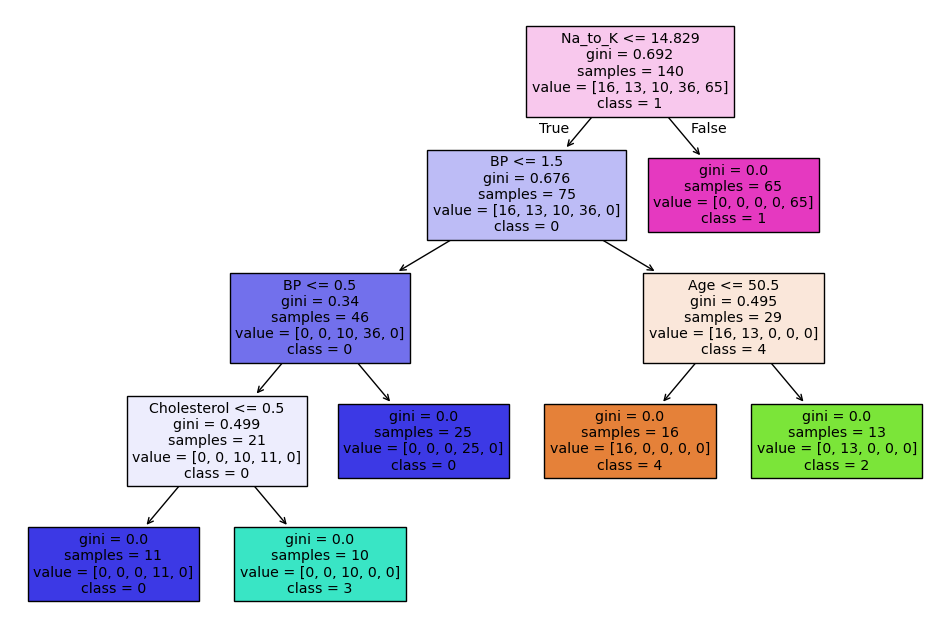

In [12]:
plt.figure(figsize=(12,8))
tree.plot_tree(model , filled=True, feature_names=df.columns.tolist(),class_names=df['Drug'].unique().astype(str))
plt.show()